# API

In [4]:
! pip install spotipy

Defaulting to user installation because normal site-packages is not writeable


In [12]:
import os
import pandas as pd
import seaborn as sns
from dotenv import load_dotenv
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import requests
import matplotlib.pyplot as plt

from dotenv import load_dotenv
load_dotenv()

client_id = os.getenv('CLIENT_ID')
client_secret = os.getenv('CLIENT_SECRET')

In [13]:
# Configura las credenciales para el cliente de Spotify
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)

# Inicializa el cliente de Spotify
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)


### Realizar solicitudes a la API

In [17]:
# Especificamos el artista que queremos analizar 
artist_id = "790FomKkXshlbRYZFtlgla"

top_tracks = sp.artist_top_tracks(artist_id)['tracks']

# Imprimimos las diez mejores canciones, duracion y popularidad 
for idx, track in enumerate(top_tracks, start=1):
    print(f"{idx}. {track['name']} - Duración: {track['duration_ms']} ms - Popularidad: {track['popularity']}")


1. Si Antes Te Hubiera Conocido - Duración: 195824 ms - Popularidad: 96
2. QLONA - Duración: 172797 ms - Popularidad: 87
3. AMARGURA - Duración: 170480 ms - Popularidad: 87
4. MI EX TENÍA RAZÓN - Duración: 154374 ms - Popularidad: 85
5. PROVENZA - Duración: 207626 ms - Popularidad: 83
6. TQG - Duración: 197933 ms - Popularidad: 83
7. MIENTRAS ME CURO DEL CORA - Duración: 164386 ms - Popularidad: 82
8. MAMIII - Duración: 226093 ms - Popularidad: 80
9. CONTIGO (with Tiësto) - Duración: 192786 ms - Popularidad: 81
10. X SI VOLVEMOS - Duración: 200120 ms - Popularidad: 80


### Transformar a Pandas DataFrame

In [22]:
# Creamos un dataframe para las mejores canciones y visualizamos 3  
tracks_df = pd.DataFrame([{"Name": track['name'], "Duration (minutes)": track['duration_ms'] / 60000, "Popularity": track['popularity']} for track in top_tracks])

print(tracks_df.head(3))

                           Name  Duration (minutes)  Popularity
0  Si Antes Te Hubiera Conocido            3.263733          96
1                         QLONA            2.879950          87
2                      AMARGURA            2.841333          87


### Analizar relación estadística

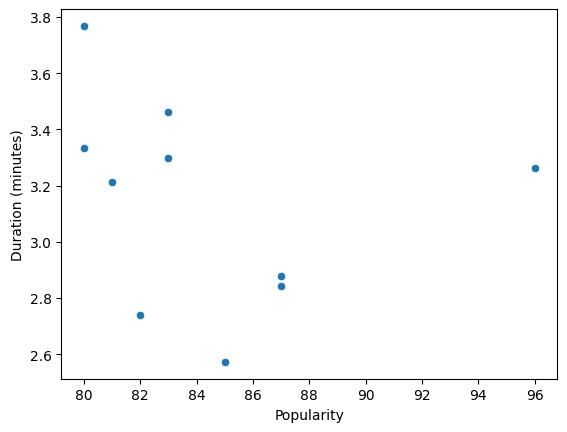

In [25]:
scatter_plot = sns.scatterplot(data=tracks_df, x="Popularity", y="Duration (minutes)")
plt.show()

se puede observar que no hay relación directa entre la duracion de la canción y la popularidad